# **Let's get it - 파이썬 프로그래밍**
---
## **Part2**
### 11. 프로젝트로 파이썬 완성하기: 핫플레이스 인구 분석
    프로젝트 목표: 핫플레이스의 인구 분석

#### **11.1 데이터 선정하기**
- 데이터셋
    * 인구 데이터: 서울 생활인구(내국인)_행정동 단위 19년 12월 데이터
    * 행정동코드 데이터: 행정구역 코드정보
- 출처: 서울 열린데이터 광장

#### **11.1.2 목표 수립하기**
- 목표: 핫플레이스가 있는 행정동에서 인구가 가장 적은 시간대 파악하기
    - 하위 목표1: 핫플레이스가 있는 행정동의 시간대별 평균인구 그래프를 그려 분석하기
        - 꺽은선 그래프
    - 하위 목표2: 핫플레이스가 있는 행정동의 주중/주말 시간대별 평균인구 그래프를 그려 분석하기
        - 꺽은선 그래프, 막대그래프
    - 하위 목표3: 핫플레이스가 있는 행정동의 남녀 시간대별 평균인구 그래프를 그려 분석하기
        - 꺽은선 그래프, 가로형 막대그래프
    - 하위 목표4: 핫플레이스가 있는 행정동과 나에게 익숙한 행정동의 사간대별 평균인구 그래프를 그려 비교 분석하기
        - 꺽은선 그래프

#### **11.2 프로그램으로 구현하기**

In [1]:
# 라이브러리 불러오기
import csv
import matplotlib.pyplot as plt

In [2]:
# 인구 데이터파일 불러오기
path1 = 'C:/Users/SanghoonOh/ai03/HotPlace_Analysis/Datasets/LOCAL_PEOPLE_DONG_201912.csv'

f = open(path1, encoding='utf8')

data = csv.reader(f)
next(data)
data = list(data)
print('데이터 수:', len(data))

데이터 수: 315456


In [3]:
# 행정동코드 데이터파일 불러오기
path2 = 'C:/Users/SanghoonOh/ai03/HotPlace_Analysis/Datasets/행정동코드_매핑정보_20200325.csv'

f2 = open(path2, encoding='utf8')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)
print('데이터 수(행정동의 수):', len(code_data))

데이터 수(행정동의 수): 424


In [4]:
print(data[0])

['20191201', '00', '11215710', '45694.998800000001', '452.3937', '208.7971', '1267.7678000000001', '5642.9234999999999', '5433.6800999999996', '2494.5992999999999', '1691.4830999999999', '1042.7095999999999', '1058.3378', '895.46389999999997', '875.9212', '601.90970000000004', '496.2165', '850.68200000000002', '388.40050000000002', '180.37209999999999', '1586.7039', '6973.6175999999996', '4259.7021999999997', '2036.1446000000001', '1285.4200000000001', '794.6241', '833.71789999999999', '772.14170000000001', '773.21519999999998', '827.14549999999997', '565.53779999999995', '1405.3706999999999', '']


In [5]:
# 데이터 타입 변환하기: 1~2열-int / 3열 이상-float
for row in data:
    for i in range(1, 32):
        if i <= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']


In [6]:
print(code_data[0])

['1101053', '11110530', '서울', '종로구', '사직동']


In [7]:
# 행정동코드 열 int로 변환하기
for row in code_data:
    row[1] = int(row[1])
print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


In [8]:
# 행정동명과 행정동코드 연결하기
dong_name = input('행정동을 입력하세요--->')

for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]
print(dong_name, '-', dong_code, '을(를) 분석합니다!')

행정동을 입력하세요--->압구정동
압구정동 - 11680545 을(를) 분석합니다!


### 11.2.2 하위 목표1 - 시간대별 인구 분석하기

In [9]:
# 시간대별 인구 리스트 만들기(0시~23시)
population = [0 for i in range(24)]
print(population)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]
        population[time] += p
population = [p/31 for p in population]

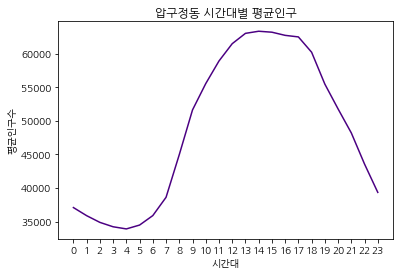

In [11]:
plt.title(dong_name + ' 시간대별 평균인구')
plt.plot(range(24), population, color='indigo')
plt.xticks(range(24), range(24))
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

### 결과 분석
- 인구가 가장 적은 시간은 1시 ~ 6시 사이
    - 새벽에는 인구 움직임이 적으니, 대부분 압구정 거주 인원으로 추정
- 가장 인구가 많은 시간은 12시 ~ 18시 사이
    - 평균인구 약 6만명으로 출근 및 등교 인원
- **오전 10시 ~ 11시 브런치 약속이나 19시 이후 저녁 약속 추천**

### 11.2.3 하위 목표2 - 주중/주말 시간대별 인구 분석하기

In [12]:
import datetime

# 0-월, 1-화, 2-수, 3-목, 4-금, 5-토, 6-일
datetime.date(2019, 12, 15).weekday()

6

In [13]:
# 주중, 주말 리스트 만들기
weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]
        year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
        num = datetime.date(year, mon, day).weekday()
        if num < 5:
            weekday[time] += p
        else:
            weekend[time] += p

In [14]:
# 2019년 12월 주중/주말 일수 구하기
weekday_cnt, weekend_cnt = 0, 0

for i in range(1, 32):
    if datetime.date(2019, 12, i).weekday() < 5:
        weekday_cnt += 1
    else:
        weekend_cnt += 1

print('2019년 12월 주중 일수 =',  weekday_cnt, '\n2019년 12월 주말 일수 =', weekend_cnt)

2019년 12월 주중 일수 = 22 
2019년 12월 주말 일수 = 9


In [15]:
weekday = [w/weekday_cnt for w in weekday]
weekend = [w/weekend_cnt for w in weekend]

print('주중 인구:', weekday)
print('주말 인구:', weekend)

주중 인구: [36348.0879, 35284.529854545464, 34498.768759090904, 34028.96384545454, 33899.33714545454, 34599.74798636365, 36262.84079090908, 39520.43202272727, 47412.64013636365, 54707.293981818184, 58675.10905, 61947.59178181819, 64325.155981818185, 65856.20964545454, 66227.48544545454, 66413.45866818182, 66251.15107727272, 66640.75652727274, 64521.26677272727, 58771.3062409091, 54535.62893636364, 50508.405322727274, 45000.37916363635, 40292.146422727266]
주말 인구: [38933.31007777777, 37376.29128888888, 35857.52363333333, 34752.6713, 33971.79182222223, 34237.23188888889, 35032.00224444444, 36442.80891111111, 39032.354877777776, 44120.33687777778, 47925.02798888888, 51506.637777777774, 54567.81698888889, 56124.18155555555, 56298.54536666667, 55353.43318888889, 54134.06342222222, 52379.621722222226, 49707.45673333333, 47417.98314444444, 45043.66387777778, 42578.63195555555, 40075.01161111111, 37075.203344444446]


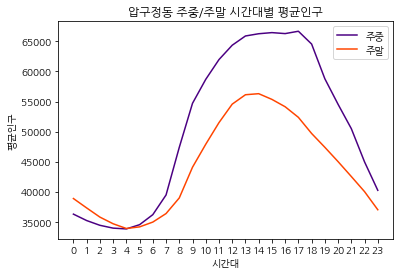

In [16]:
# 주중/주말 시간대별 평균인구 꺽은선 그래프
plt.title(dong_name + ' 주중/주말 시간대별 평균인구')
plt.plot(weekday, color='indigo', label='주중')
plt.plot(weekend, color='orangered', label='주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구')
plt.xticks(range(24), range(24))
plt.show()

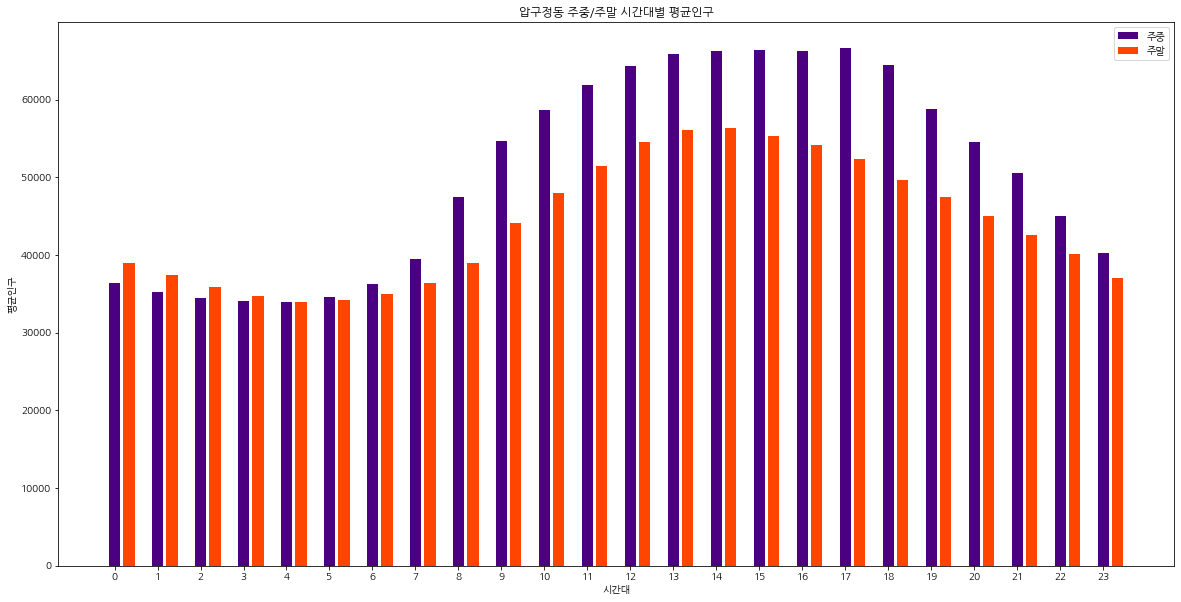

In [17]:
# 주중/주말 시간대별 평균인구 막대그래프
plt.figure(figsize=(20, 10))
plt.title(dong_name + ' 주중/주말 시간대별 평균인구')
plt.bar(range(0, 72, 3), weekday, color='indigo', label='주중')
plt.bar(range(1, 73, 3), weekend, color='orangered', label='주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구')
plt.xticks(range(0, 72, 3), range(24))
plt.show()

### 결과 분석
- 핫플레이스라 주중보다 주말에 사람이 더 많을 것이라 예상했지만, 주중 인구가 대체로 더 많음
- 예외적으로 자정을 넘어 4시까지는 주말이 주중보다 더 많음

### 11.2.4 하위 목표3 - 남녀 시간대별 평균인구 분석하기

In [19]:
male = [0 for i in range(24)]
female = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time = row[1]
        male[time] += sum(row[4:18])  # 남성 인구 총합 구하기
        female[time] += sum(row[18:32])  # 여성 인구 총합 구하기ㅣ
male = [m/31 for m in male]
female = [f/31 for f in female]

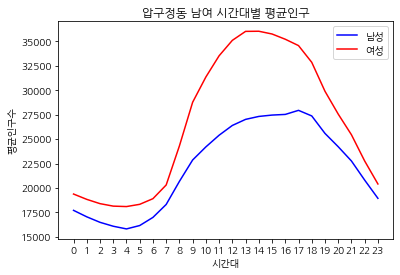

In [22]:
# 남녀 시간대별 평균인구 꺽은선 그래프 그리기
plt.title(dong_name + ' 남여 시간대별 평균인구')
plt.plot(male, color='b', label='남성')
plt.plot(female, color='r', label='여성')
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.legend()
plt.xticks(range(24), range(24))
plt.show()

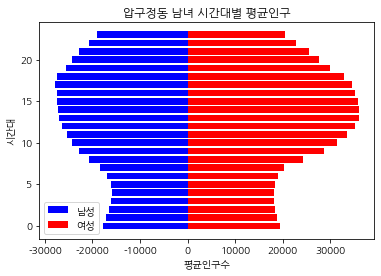

In [23]:
# 좌우 가로형 막대 그래프 그리기
male = [-m for m in male]  # 좌측으로 그리기 위해 음수 처리

plt.title(dong_name + ' 남녀 시간대별 평균인구')
plt.barh(range(24), male, color='b', label='남성')
plt.barh(range(24), female, color='r', label='여성')
plt.xlabel('평균인구수')
plt.ylabel('시간대')
plt.legend()
plt.show()

### 결과 분석
- 압구정동은 남성보다 여성이 매 시간대 더 많음
- 출근 시간대 급격하게 전체 인원이 늘어나고 저녁시간대 줄어듬
- 출퇴근 인원 또한 남성보다 여성이 훨씬 많음